# Example 0: Symbol Encoding with Linear Digital Amplitude-Phase Modulations

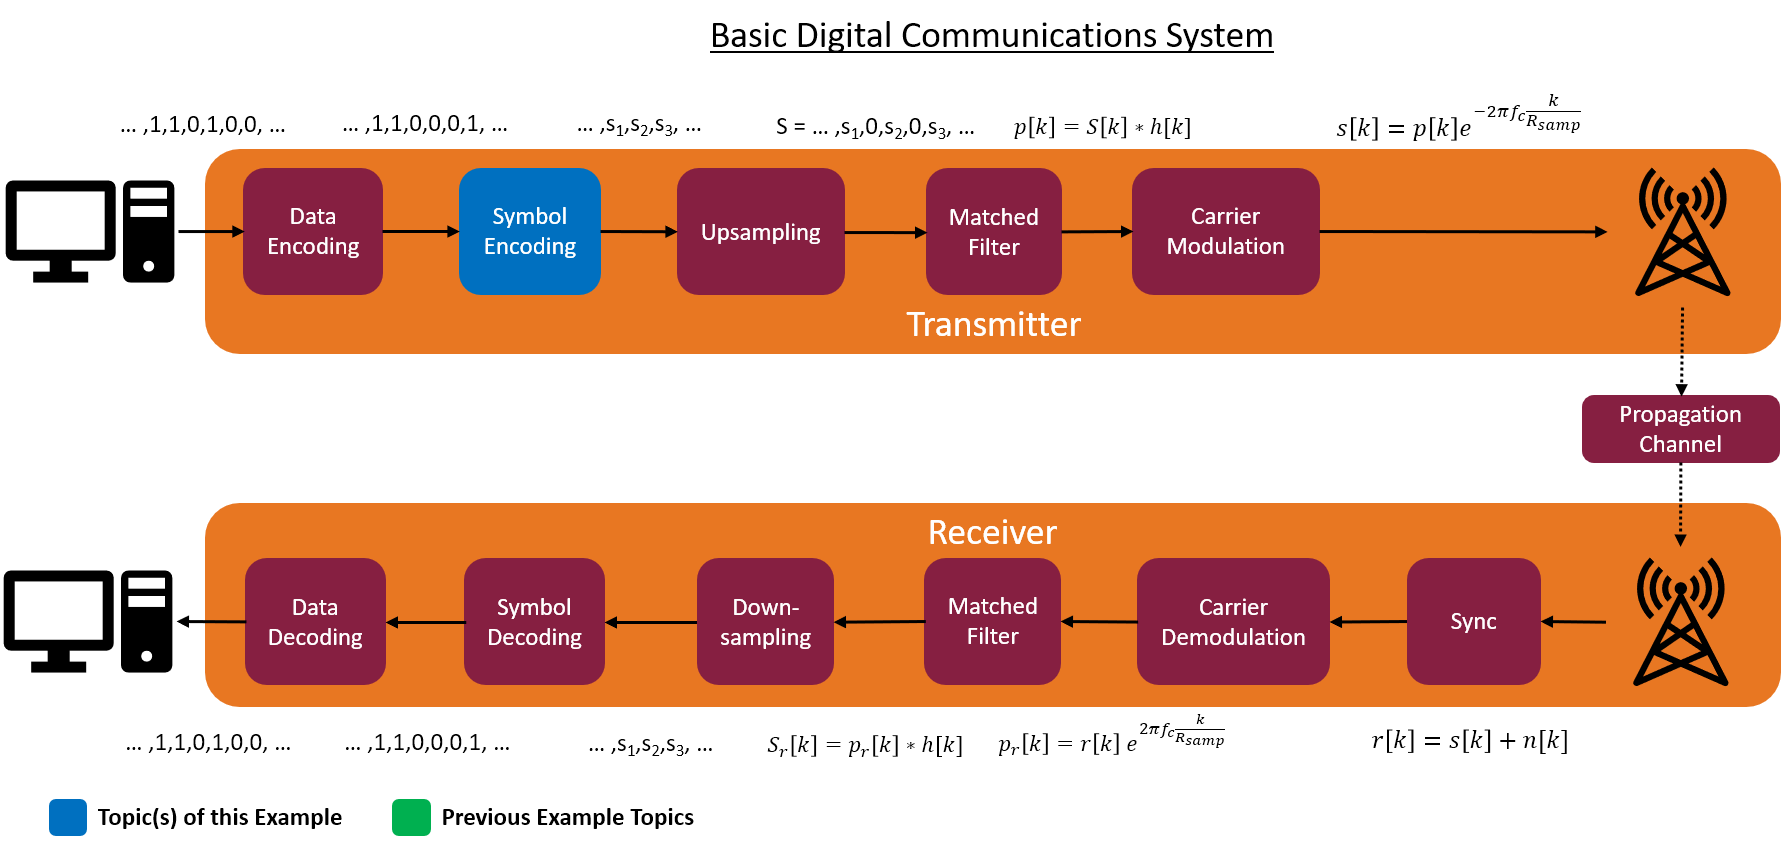

In this notebook example, we will briefly introduce the concept of digital modulation, with a focus on Linear Digital Amplitude-Phase Modulations (LDAPMs). 

From [Wikipedia](https://en.wikipedia.org/wiki/Modulation):
>In electronics and telecommunications, **modulation** is the process of varying one or more properties of a periodic waveform, called the carrier signal, with a separate signal that typically contains information to be transmitted.

As the acronym implies, for LDAPM signals, the properties of the carrier signal that are modulated are the carrier signal's amplitude and/or phase.

*Note: Within this notebook example, make sure you execute each codeblock before proceeding to the next section.*

In [1]:
# Setting Imports and Pathing for Example
import sys
sys.path.append("../")

import numpy as np
import src.modems as modems
import matplotlib.pyplot as plt

# Setting Plotting Parameters for Example
dx = -15.0; dy = -15.0
fontsize = 18
plot_figsize_small   = (5.0, 5.0)
plot_figsize_large   = (20.0, 20.0)
subplot_sqr_figsize  = (20.0, 20.0)
subplot_rect_figsize = (20.0, 10.0)

## Modulation Symbols and Constellation Plots
The information transmitted within [digital modulations](https://en.wikipedia.org/wiki/Modulation#Digital_modulation_methods), such as LDAPMs, are data bits (0's and 1's). For LDAPM signals (specific examples of which are to follow), these bits get packaged into amplitude-phase "symbols". An amplitude-phase symbol can be represented by a [complex number](https://en.wikipedia.org/wiki/Complex_number) of the form

$S = I+jQ$,

where I is termed the real component of the symbol and Q is termed the imaginary component of the symbol (also known as the [in-phase and quadrature components](https://en.wikipedia.org/wiki/In-phase_and_quadrature_components), respectively). The amplitude ($\alpha$) and phase ($\theta$) values of the symbol can thus be found by the following equations (see [here](https://en.wikipedia.org/wiki/Polar_coordinate_system#Converting_between_polar_and_Cartesian_coordinates) for details):

$\alpha = \sqrt{I^2+Q^2}$ and $\theta = \tan^{-1}\frac{Q}{I}$.

These symbols are typically visualized on a [constellation diagram](https://en.wikipedia.org/wiki/Constellation_diagram) in which the x-axis is the real (in-phase) component of the symbol and the y-axis is the imaginary (quadrature) component. The amplitude of the symbol is therefore the distance from the symbol's point on the plot to the origin and the phase of the symbol is the angle from the positive x-axis to the symbol's point on the plot.

As an example, below is code for creating the constellation plot for the symbol S = -1+2j:

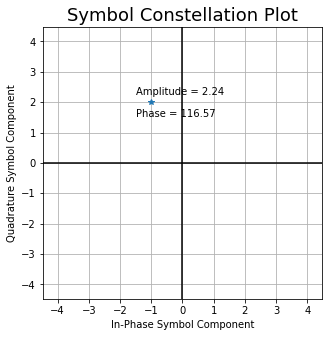

In [2]:
# Setting Example Complex Symbol (User Adjustable)
S = -1.0 + 2.0j

# Calculation of the Symbol's Amplitude and Phase
amplitude = abs(S)
phase = np.angle(S) * (180.0 / np.pi)

if phase < 0.0:
    phase = 360.0 + phase

# Figure Initialization
plt.figure(figsize=plot_figsize_small)
plt.title('Symbol Constellation Plot', fontsize=fontsize)
plt.xlabel('In-Phase Symbol Component')
plt.ylabel('Quadrature Symbol Component')
plt.xlim([-2.0*amplitude, 2.0*amplitude]); plt.ylim([-2.0*amplitude, 2.0*amplitude])
plt.axhline(0, color='black'); plt.axvline(0, color='black')
plt.grid()

# Symbol Plotting and Amplitude/Phase Labeling
plt.plot(S.real, S.imag, '*')
plt.annotate('Amplitude = '+str(np.round(amplitude,2)), xy=[S.real, S.imag], xytext=[dx, -dy/2], textcoords='offset points')
plt.annotate('Phase = '+str(np.round(phase,2)), xy=[S.real, S.imag], xytext=[dx, dy], textcoords='offset points')

plt.show()

*Exercise: Try changing S in the codeblock above to see its impact on the constellation diagram.*

### Bits, Symbols, and Modulation Order

The [modulation order](https://en.wikipedia.org/wiki/Modulation_order) of a digital modulation defines the number of symbols that make up its symbol set. Given that the symbols are the method by which bits are to be transmitted, the modulation order therefore determines the number of bits that are transmitted per symbol. This relationship is defined as:

$bits\_per\_symb = \log_2\{mod_{order}\}$

The mapping of bits to symbols is defined by the communications system and can vary based on the application. In the following overview of a few of the common LDAPM types, example approaches to defining these mappings are shown. **However, it is important to note that these example mappings are suboptimal for modulation orders greater than 2 (see [here](https://en.wikipedia.org/wiki/Gray_code) for more information).**

## Example LDAPM Types

In the following, the constellation diagrams of a few common LDAPM types are shown. **Note, the design decisions behind choosing an appropriate LDAPM type are outside of the scope of this example and are to be discussed in a later example.**

### Amplitude Shift Keying (ASK)

In [Amplitude Shift Keying (ASK)](https://en.wikipedia.org/wiki/Amplitude-shift_keying), bits are mapped to symbols of discrete amplitude values, all with the same constant phase value:

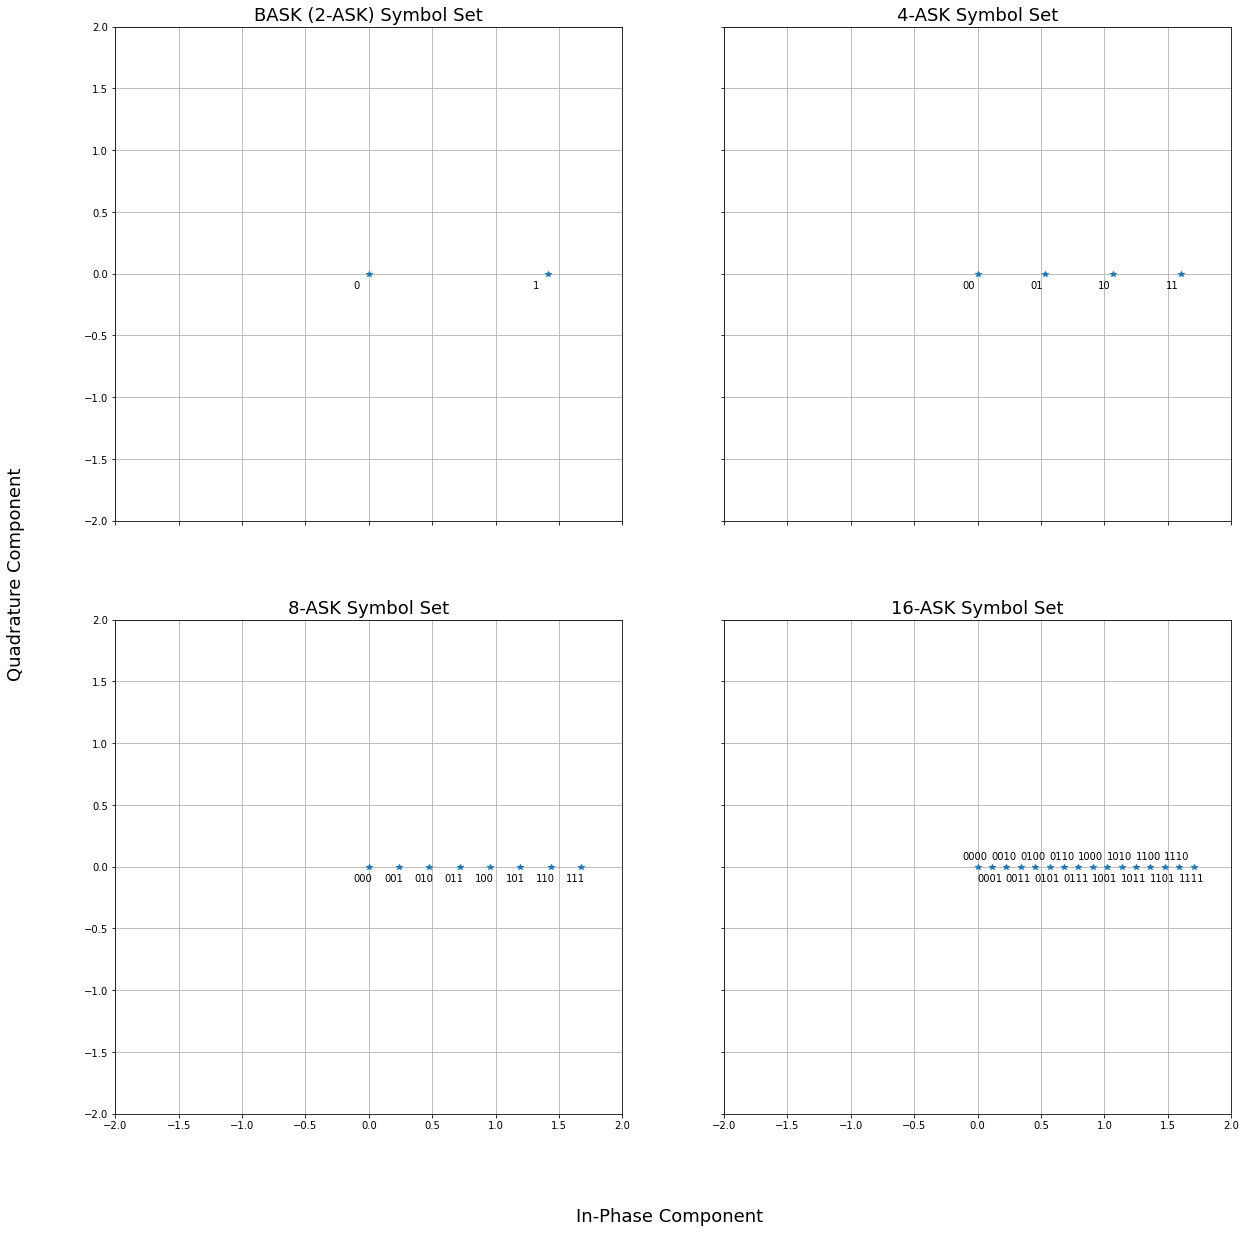

In [3]:
# Creating ASK Modems
bask = modems.ldapm(mod_type='ask', mod_order=2)
ask4 = modems.ldapm(mod_type='ask', mod_order=4)   
ask8 = modems.ldapm(mod_type='ask', mod_order=8)
ask16 = modems.ldapm(mod_type='ask', mod_order=16)    

# Figure Initialization
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=subplot_sqr_figsize)
fig.text(0.51, 0.05, 'In-Phase Component', ha='center', fontsize=fontsize)
fig.text(0.05, 0.5, 'Quadrature Component', va='center', rotation='vertical', fontsize=fontsize)
plt.xlim([-2.0, 2.0]); plt.ylim([-2.0, 2.0])
axs[0, 0].grid(); axs[0, 1].grid(); axs[1, 0].grid(); axs[1, 1].grid()

# Plotting BASK (2-ASK) Symbols
axs[0, 0].plot(bask.symb_table.real, bask.symb_table.imag, '*')
axs[0, 0].set_title('BASK (2-ASK) Symbol Set', fontsize=fontsize)
for i,x in enumerate(bask.symb_table):
    axs[0, 0].annotate(format(i, '01b'), xy=[x.real, x.imag], xytext=[dx, dy], textcoords='offset points')

# Plotting 4-ASK Symbols
axs[0, 1].plot(ask4.symb_table.real, ask4.symb_table.imag, '*')
axs[0, 1].set_title('4-ASK Symbol Set', fontsize=fontsize)
for i,x in enumerate(ask4.symb_table):
    axs[0, 1].annotate(format(i, '02b'), xy=[x.real, x.imag], xytext=[dx, dy], textcoords='offset points')

# Plotting 8-ASK Symbols
axs[1, 0].plot(ask8.symb_table.real, ask8.symb_table.imag, '*')
axs[1, 0].set_title('8-ASK Symbol Set', fontsize=fontsize)
for i,x in enumerate(ask8.symb_table):
    axs[1, 0].annotate(format(i, '03b'), xy=[x.real, x.imag], xytext=[dx, dy], textcoords='offset points')

# Plotting 16-ASK Symbols
axs[1, 1].plot(ask16.symb_table.real, ask16.symb_table.imag, '*')
axs[1, 1].set_title('16-ASK Symbol Set', fontsize=fontsize)
for i,x in enumerate(ask16.symb_table):
    if i%2:
        axs[1, 1].annotate(format(i, '04b',), xy=[x.real, x.imag], xytext=[dx, dy], textcoords='offset points')
    else:
        axs[1, 1].annotate(format(i, '04b',), xy=[x.real, x.imag], xytext=[dx, -dy/2], textcoords='offset points')

plt.show()

### Phase Shift Keying (PSK)

In [Phase Shift Keying (PSK)](https://en.wikipedia.org/wiki/Phase-shift_keying), bits are mapped to symbols of discrete phase values, all with the same constant amplitude value:

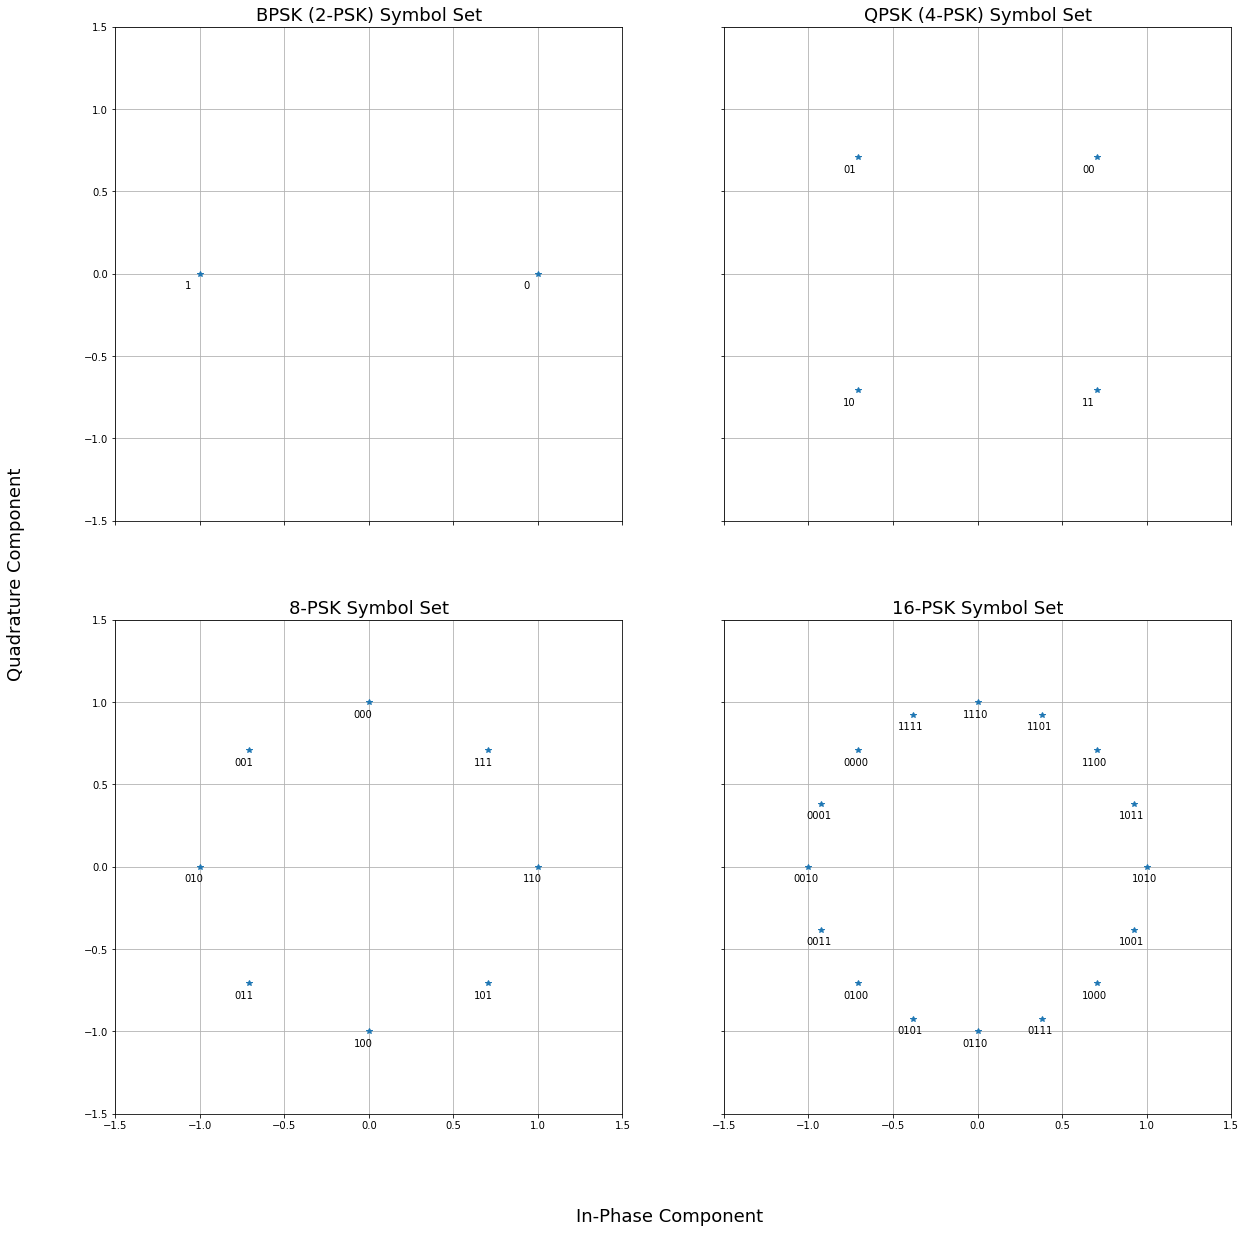

In [4]:
# Creating PSK Modems
bpsk = modems.ldapm(mod_type='psk', mod_order=2)
qpsk = modems.ldapm(mod_type='psk', mod_order=4)
psk8 = modems.ldapm(mod_type='psk', mod_order=8)
psk16 = modems.ldapm(mod_type='psk', mod_order=16)

# Figure Initialization
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=subplot_sqr_figsize)
fig.text(0.51, 0.05, 'In-Phase Component', ha='center', fontsize=fontsize)
fig.text(0.05, 0.5, 'Quadrature Component', va='center', rotation='vertical', fontsize=fontsize)
plt.xlim([-1.5, 1.5]); plt.ylim([-1.5, 1.5])
axs[0, 0].grid(); axs[0, 1].grid(); axs[1, 0].grid(); axs[1, 1].grid()

# Plotting BPSK (2-PSK) Symbols
axs[0, 0].plot(bpsk.symb_table.real, bpsk.symb_table.imag, '*')
axs[0, 0].set_title('BPSK (2-PSK) Symbol Set', fontsize=fontsize)
for i,x in enumerate(bpsk.symb_table):
    axs[0, 0].annotate(format(i, '01b'), xy=[x.real, x.imag], xytext=[dx, dy], textcoords='offset points')

# Plotting QPSK (4-PSK) Symbols
axs[0, 1].plot(qpsk.symb_table.real, qpsk.symb_table.imag, '*')
axs[0, 1].set_title('QPSK (4-PSK) Symbol Set', fontsize=fontsize)
for i,x in enumerate(qpsk.symb_table):
    axs[0, 1].annotate(format(i, '02b'), xy=[x.real, x.imag], xytext=[dx, dy], textcoords='offset points')

# Plotting 8-PSK Symbols
axs[1, 0].plot(psk8.symb_table.real, psk8.symb_table.imag, '*')
axs[1, 0].set_title('8-PSK Symbol Set', fontsize=fontsize)
for i,x in enumerate(psk8.symb_table):
    axs[1, 0].annotate(format(i, '03b'), xy=[x.real, x.imag], xytext=[dx, dy], textcoords='offset points')

# Plotting 16-PSK Symbols
axs[1, 1].plot(psk16.symb_table.real, psk16.symb_table.imag, '*')
axs[1, 1].set_title('16-PSK Symbol Set', fontsize=fontsize)
for i,x in enumerate(psk16.symb_table):
    axs[1, 1].annotate(format(i, '04b',), xy=[x.real, x.imag], xytext=[dx, dy], textcoords='offset points')
    
plt.show()

### Quadrature Amplitude Modulation (QAM)

In [Quadrature Amplitude Modulation (QAM)](https://en.wikipedia.org/wiki/Quadrature_amplitude_modulation), bits are mapped to symbols of discrete amplitude and phase values:

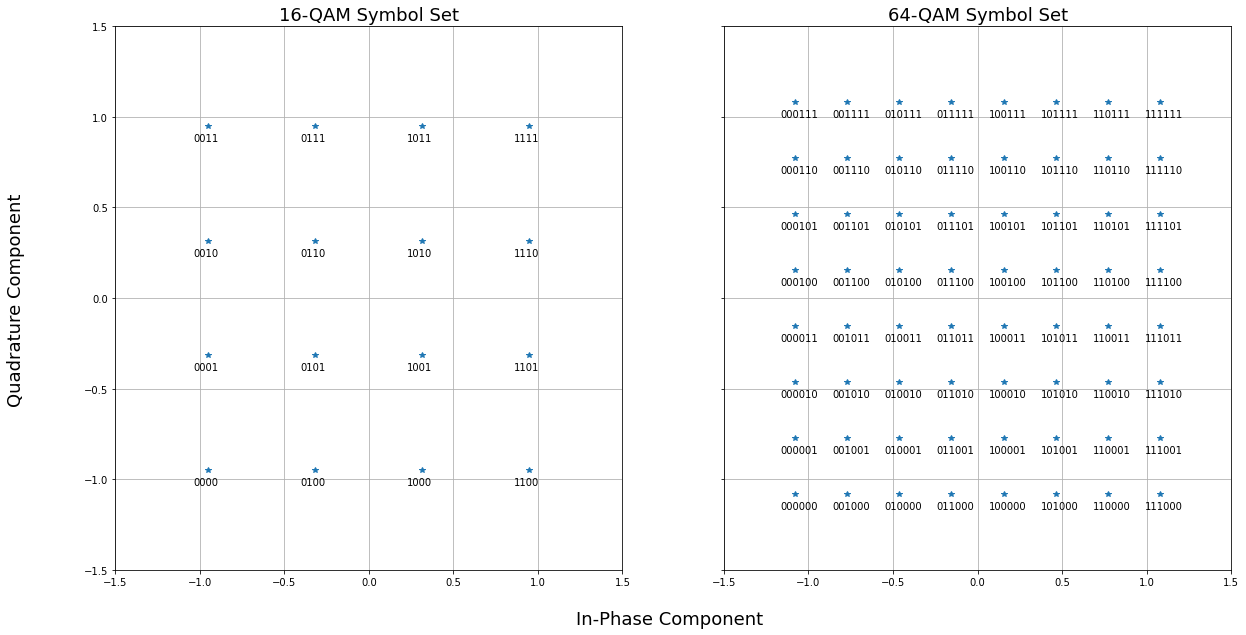

In [5]:
# Creating QAM Modems
qam16 = modems.ldapm(mod_type='qam', mod_order=16)
qam64 = modems.ldapm(mod_type='qam', mod_order=64)

# Figure Initialization
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=subplot_rect_figsize)
fig.text(0.51, 0.05, 'In-Phase Component', ha='center', fontsize=fontsize)
fig.text(0.05, 0.5, 'Quadrature Component', va='center', rotation='vertical', fontsize=fontsize)
plt.xlim([-1.5, 1.5]); plt.ylim([-1.5, 1.5])
axs[0].grid(); axs[1].grid()

# Plotting 16-QAM Symbols
axs[0].plot(qam16.symb_table.real, qam16.symb_table.imag, '*')
axs[0].set_title('16-QAM Symbol Set', fontsize=fontsize)
for i,x in enumerate(qam16.symb_table):
    axs[0].annotate(format(i, '04b'), xy=[x.real, x.imag], xytext=[dx, dy], textcoords='offset points')
    
# Plotting 64-QAM Symbols
axs[1].plot(qam64.symb_table.real, qam64.symb_table.imag, '*')
axs[1].set_title('64-QAM Symbol Set', fontsize=fontsize)
for i,x in enumerate(qam64.symb_table):
    axs[1].annotate(format(i, '06b'), xy=[x.real, x.imag], xytext=[dx, dy], textcoords='offset points')
    
plt.show()

### Generic LDAPM

The above examples are a few of the traditional LDAPM types that are used in various real-world applications. However, there are many more not covered here. **In fact, any arbitrary signal constellation can be created and used to transmit data (with varying degress of performance, to be discussed in a later example)**. As an example, the below code specifies a constellation diagram that should be familiar to Hume students.

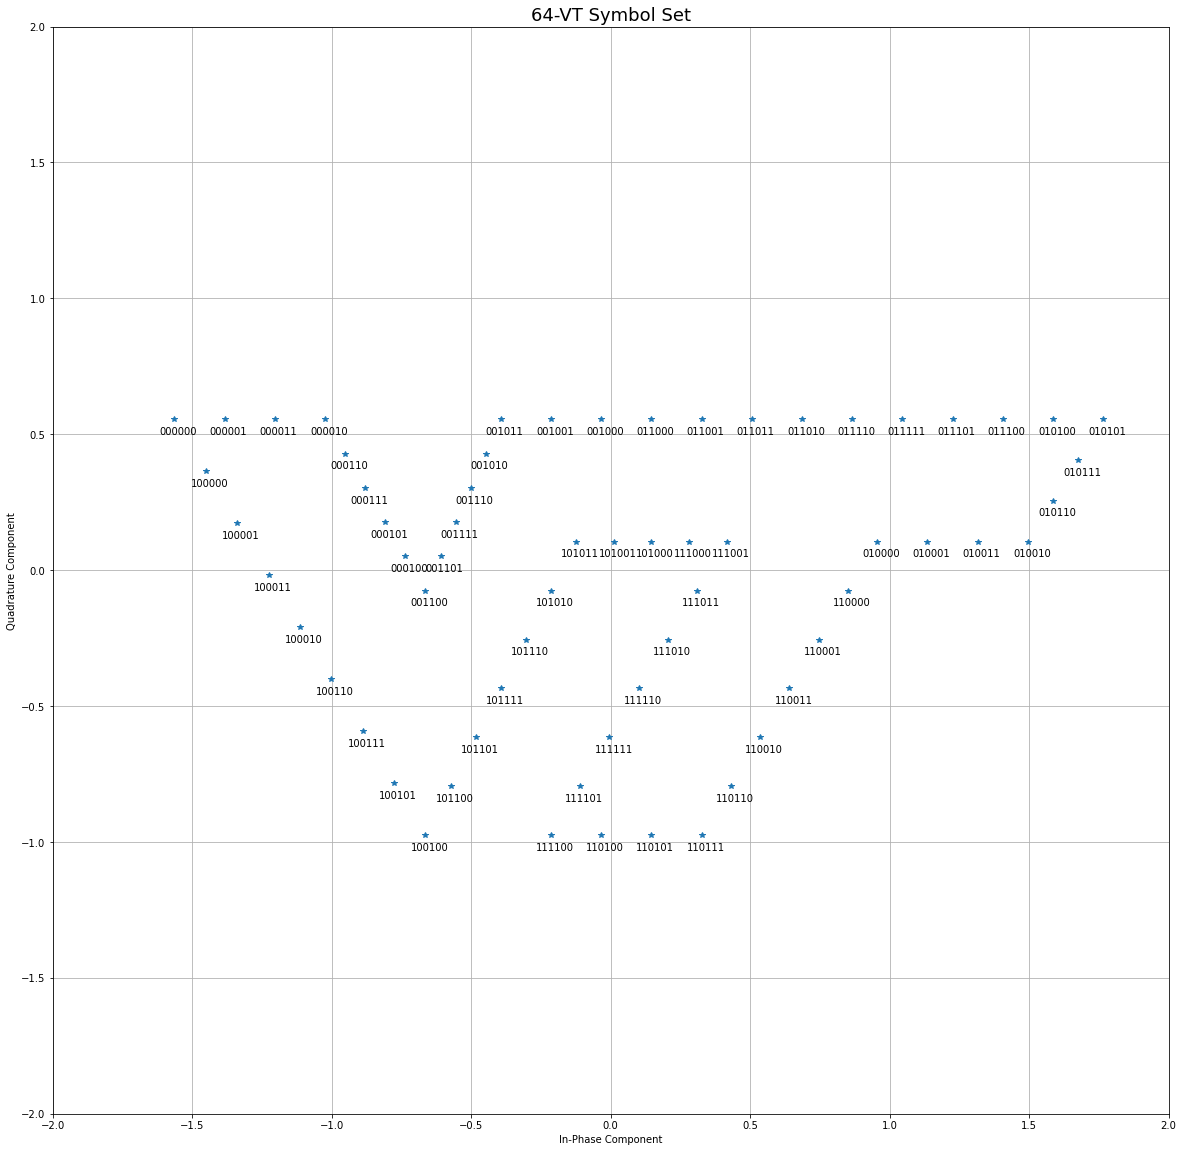

In [6]:
# Creating Custom 64-VT Modem
vt_symb_table = [ -1.5633e+00+ 5.5460e-01j, -1.3833e+00+ 5.5460e-01j,-1.0234e+00+ 5.5460e-01j, -1.2034e+00+ 5.5460e-01j,
-7.3553e-01+ 5.0751e-02j, -8.0750e-01+ 1.7671e-01j,
-9.5146e-01+ 4.2863e-01j, -8.7948e-01+ 3.0267e-01j,
-3.3741e-02+ 5.5460e-01j, -2.1368e-01+ 5.5460e-01j,
-4.4761e-01+ 4.2863e-01j, -3.9363e-01+ 5.5460e-01j,
-6.6355e-01+ -7.5211e-02j, -6.0956e-01+ 5.0751e-02j,
-5.0160e-01+ 3.0267e-01j, -5.5558e-01+ 1.7671e-01j,
9.5596e-01+ 1.0473e-01j, 1.1359e+00+ 1.0473e-01j,
1.4958e+00+ 1.0473e-01j, 1.3158e+00+ 1.0473e-01j,
1.5858e+00+ 5.5460e-01j, 1.7657e+00+ 5.5460e-01j,
1.5858e+00+ 2.5499e-01j, 1.6757e+00+ 4.0434e-01j,
1.4621e-01+ 5.5460e-01j, 3.2615e-01+ 5.5460e-01j,
6.8604e-01+ 5.5460e-01j, 5.0610e-01+ 5.5460e-01j,
1.4058e+00+ 5.5460e-01j, 1.2259e+00+ 5.5460e-01j,
8.6599e-01+ 5.5460e-01j, 1.0459e+00+ 5.5460e-01j,
-1.4508e+00+ 3.6385e-01j, -1.3383e+00+ 1.7221e-01j,
-1.1134e+00+ -2.1017e-01j, -1.2259e+00+ -1.8529e-02j,
-6.6355e-01+ -9.7494e-01j, -7.7601e-01+ -7.8420e-01j,
-1.0009e+00+ -4.0181e-01j, -8.8848e-01+ -5.9255e-01j,
1.4621e-01+ 1.0473e-01j, 1.1246e-02+ 1.0473e-01j,
-2.1368e-01+ -7.5211e-02j, -1.2371e-01+ 1.0473e-01j,
-5.7358e-01+ -7.9499e-01j, -4.8360e-01+ -6.1505e-01j,
-3.0366e-01+ -2.5516e-01j, -3.9363e-01+ -4.3510e-01j,
8.5069e-01+ -7.5211e-02j, 7.4632e-01+ -2.5516e-01j,
5.3579e-01+ -6.1505e-01j, 6.4105e-01+ -4.3510e-01j,
-3.3741e-02+ -9.7494e-01j, 1.4621e-01+ -9.7494e-01j,
4.3142e-01+ -7.9499e-01j, 3.2615e-01+ -9.7494e-01j,
2.8116e-01+ 1.0473e-01j, 4.1612e-01+ 1.0473e-01j,
2.0649e-01+ -2.5516e-01j, 3.1086e-01+ -7.5211e-02j,
-2.1368e-01+ -9.7494e-01j, -1.0842e-01+ -7.9499e-01j,
1.0122e-01+ -4.3510e-01j, -4.0500e-03+ -6.1505e-01j]
vt64 = modems.ldapm(mod_type='custom', mod_order=64, symb_table=vt_symb_table)

# Figure Initialization
fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=plot_figsize_large)
plt.title('64-VT Symbol Set', fontsize=fontsize)
plt.xlabel('In-Phase Component')
plt.ylabel('Quadrature Component')
plt.xlim([-2.0, 2.0]); plt.ylim([-2.0, 2.0])
plt.grid()

# Plotting 64-VT Symbols
axs.plot(vt64.symb_table.real, vt64.symb_table.imag, '*')
for i,x in enumerate(vt64.symb_table):
    axs.annotate(format(i, '06b'), xy=[x.real, x.imag], xytext=[dx, dy], textcoords='offset points')
    
plt.show()